In [3]:
import pandas as pd
import datetime
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

data = pd.read_csv("TWTR.csv")
print(data.head())

         Date       Open       High        Low      Close  Adj Close  \
0  2013-11-07  45.099998  50.090000  44.000000  44.900002  44.900002   
1  2013-11-08  45.930000  46.939999  40.685001  41.650002  41.650002   
2  2013-11-11  40.500000  43.000000  39.400002  42.900002  42.900002   
3  2013-11-12  43.660000  43.779999  41.830002  41.900002  41.900002   
4  2013-11-13  41.029999  42.869999  40.759998  42.599998  42.599998   

        Volume  
0  117701670.0  
1   27925307.0  
2   16113941.0  
3    6316755.0  
4    8688325.0  


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2264 non-null   object 
 1   Open       2259 non-null   float64
 2   High       2259 non-null   float64
 3   Low        2259 non-null   float64
 4   Close      2259 non-null   float64
 5   Adj Close  2259 non-null   float64
 6   Volume     2259 non-null   float64
dtypes: float64(6), object(1)
memory usage: 123.9+ KB
None


In [5]:
print(data.isnull().sum())

Date         0
Open         5
High         5
Low          5
Close        5
Adj Close    5
Volume       5
dtype: int64


In [8]:
data = data.dropna()

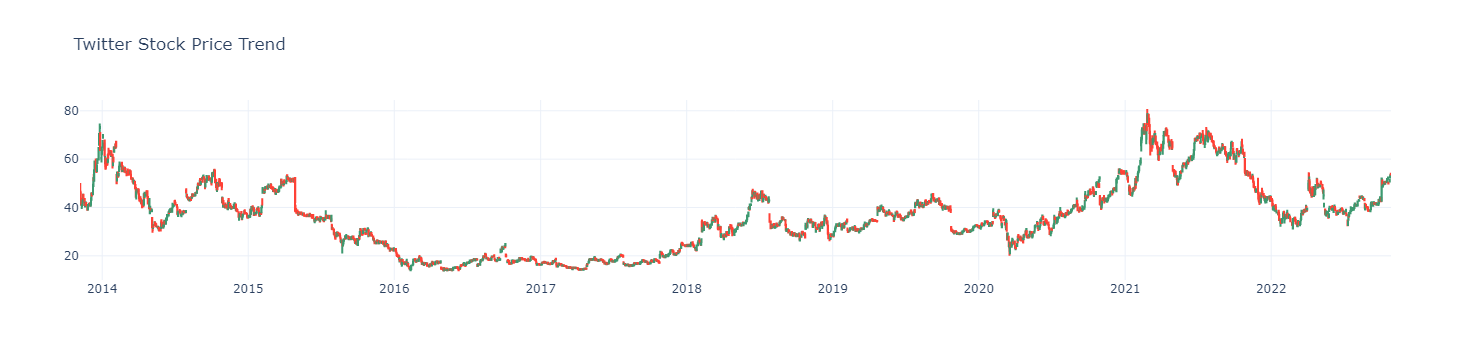

In [10]:
figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                        open=data["Open"], 
                                        high=data["High"],
                                        low=data["Low"], 
                                        close=data["Close"])])
figure.update_layout(title = "Twitter Stock Price Trend", 
                     xaxis_rangeslider_visible=False)
figure.show()

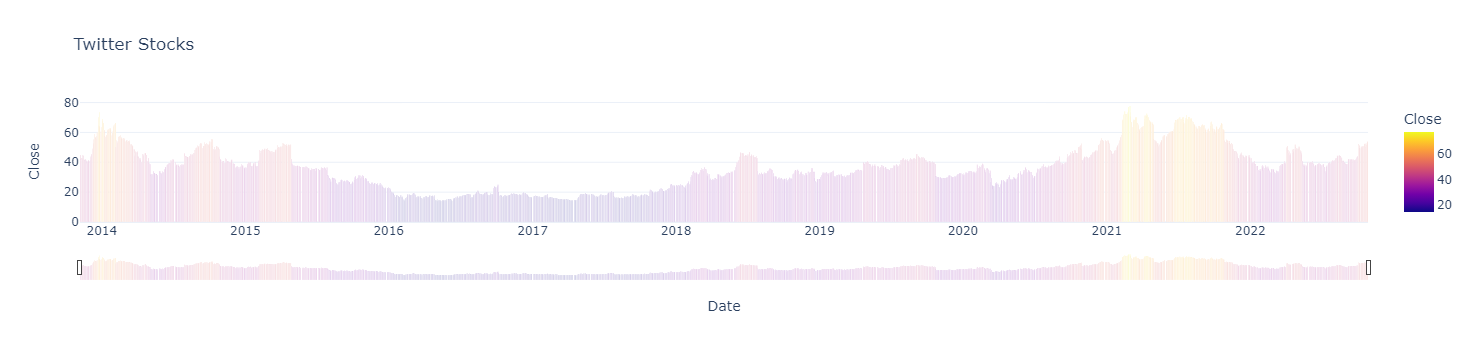

In [12]:
figure = px.bar(data, 
                x = "Date", 
                y= "Close", 
                color="Close",
                title="Twitter Stocks")
figure.update_xaxes(rangeslider_visible=True)
figure.show()

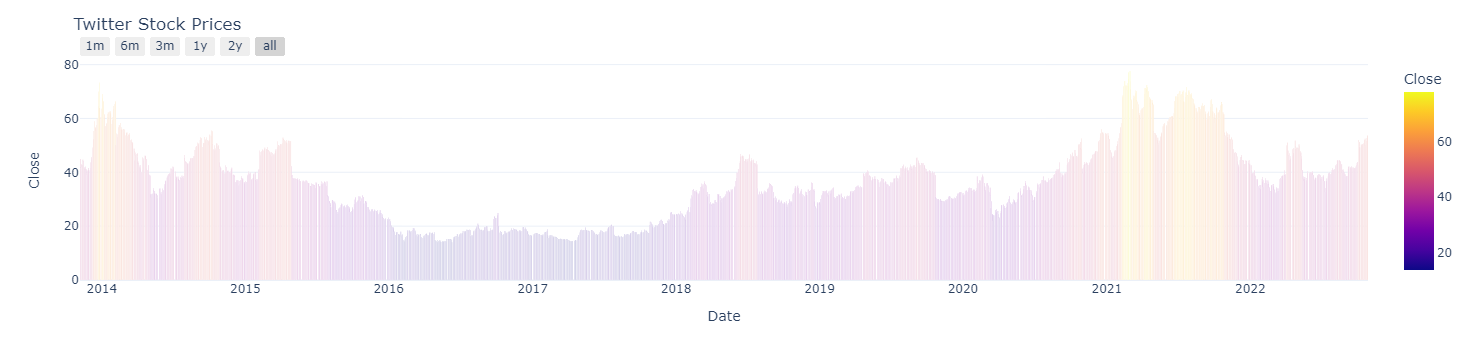

In [15]:
#Adding buttons to the graph for time periods
figure = px.bar(data, x = "Date", y= "Close", color="Close")
figure.update_xaxes(rangeslider_visible=True)
figure.update_layout(title = "Twitter Stock Prices", 
                     xaxis_rangeslider_visible=False)
figure.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
figure.show()

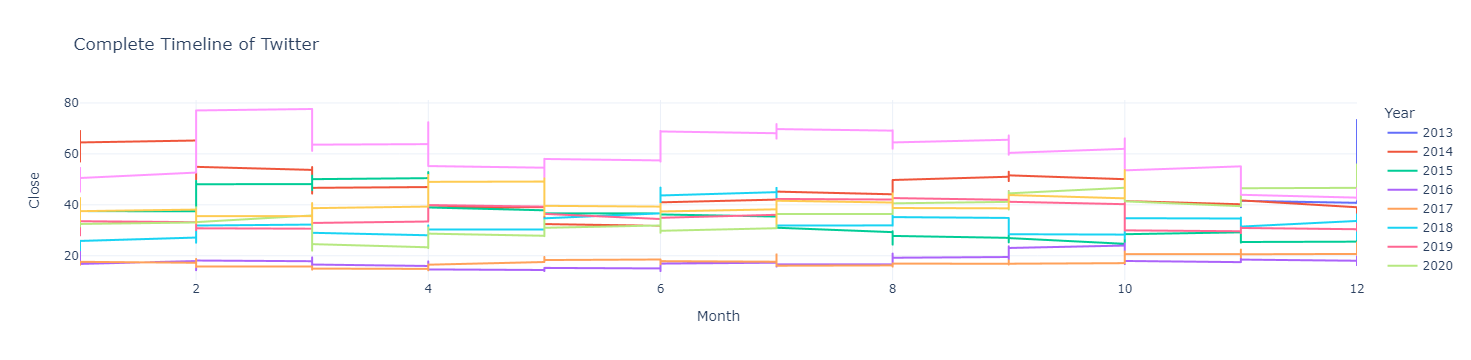

In [16]:
data["Date"] = pd.to_datetime(data["Date"], 
                              format = '%Y-%m-%d')
data['Year'] = data['Date'].dt.year
data["Month"] = data["Date"].dt.month
fig = px.line(data, 
              x="Month", 
              y="Close", 
              color='Year', 
              title="Complete Timeline of Twitter")
fig.show()